# Testing Nenya

In [1]:
import os
import glob
from importlib import reload
from importlib import resources

import numpy as np

import xarray
import pandas

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

from ulmo.analysis import evaluate
from ulmo.models import io as model_io
from ulmo import io as ulmo_io
from ulmo.plotting import plotting
from ulmo.preproc import utils as pp_utils

from nenya import analyze_image
from nenya import io as nenya_io
from nenya import params

In [2]:
%matplotlib ipympl

# Prep the VIIRS model

In [3]:
nenya_viirs_file = os.path.join(os.getenv('OS_SST'), 'VIIRS', 'Nenya', 'models', 'nenya_viirs_v1_last.pth')

In [4]:
nenya_viirs_opts_file  = os.path.join(
            resources.files('nenya'), '../', 'runs', 'viirs', 'opts_viirs_v1.json')

# Load a stacked image

In [5]:
#img_file = '/home/xavier/Projects/Oceanography/data/ARCTERX/SST/stcc_iop25_20250120000000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc'
#img_path =  '/home/xavier/Projects/Oceanography/data/ARCTERX/SST/'
#img_file = os.path.join(img_path, 'stcc_iop25_20250126070000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc')
img_file = 'SST_stack_2025jan26.nc'

ds = xarray.load_dataarray(img_file)

## Plot SST

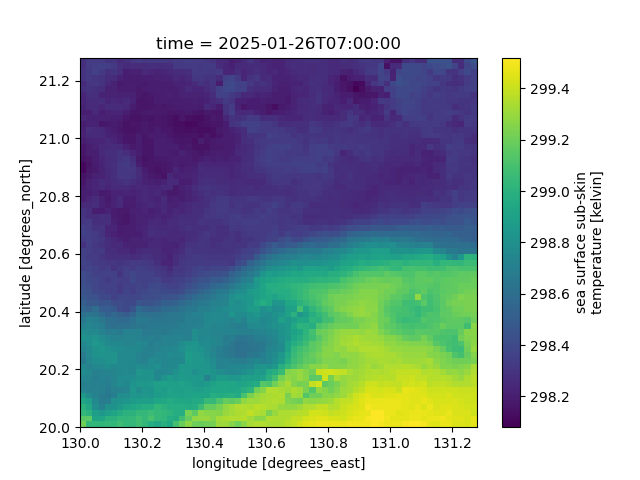

In [6]:
ds.plot()

# Pre-process

In [7]:
mask = np.zeros_like(ds.data, dtype=bool)

In [8]:
pdict = dict(inpaint=True, median=False, downscale=False)

In [9]:
pp_field, meta = pp_utils.preproc_field(ds.data, mask, **pdict) 
meta

{'Tmax': np.float32(299.52),
 'Tmin': np.float32(298.08),
 'T10': np.float32(298.22),
 'T90': np.float32(299.28),
 'mu': np.float32(298.60986)}

# Run Nenya

In [10]:
opt = params.Params(nenya_viirs_opts_file)
params.option_preprocess(opt)

In [11]:
pp_field.shape

(1, 64, 64)

In [12]:
reload(nenya_io)
latents, pp_img = analyze_image.get_latents(pp_field[0], nenya_viirs_file, opt)

/home/xavier/Projects/Oceanography/python/nenya/nenya/latents_extraction.py:208: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(model_path, map_locati

Model loaded
Beginning to evaluate


Computing latents: 100%|███████████████████████████████| 1/1 [00:00<00:00,  3.19batch/s]


In [13]:
latents.shape

(1, 256)

# $\Delta T$

In [14]:
analyze_image.calc_DT(pp_field[0], opt.random_jitter)

np.float32(0.9200134)

# UMAP

In [ ]:
reload(analyze_image)
analyze_image.umap_image('viirs_v1', pp_field[0])

Python 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
Type 'copyright', 'credits' or 'license' for more information
IPython 8.29.0 -- An enhanced Interactive Python. Type '?' for help.


load_opt 24



In [1]:  exit


/home/xavier/Projects/Oceanography/python/nenya/nenya/latents_extraction.py:208: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(model_path, map_locati

Model loaded
Beginning to evaluate


Computing latents: 100%|███████████████████████████████| 1/1 [00:00<00:00,  2.63batch/s]


Image has DT=0.920013
Embedding
Loading UMAP: /home/xavier/Projects/Oceanography/data/SST/VIIRS/Nenya/UMAP/VIIRS_Nenya_98clear_v1_DT1_UMAP.pkl
Python 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
Type 'copyright', 'credits' or 'license' for more information
IPython 8.29.0 -- An enhanced Interactive Python. Type '?' for help.


umap 108



In [1]:  umap_base


Out[1]: '/home/xavier/Projects/Oceanography/data/SST/VIIRS/Nenya/UMAP/VIIRS_Nenya_98clear_v1_DT1_UMAP.pkl'



In [2]:  os.path.isfile(umap_base)


Out[2]: True



In [3]:  tmp = pickle.load(ulmo_io.open(umap_base, "rb"))


---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[3], line 1
----> 1 tmp = pickle.load(ulmo_io.open(umap_base, "rb"))

File ~/miniconda3/envs/ocean/lib/python3.12/site-packages/numba/core/serialize.py:110, in _unpickle__CustomPickled(serialized)
    105 def _unpickle__CustomPickled(serialized):
    106     """standard unpickling for `_CustomPickled`.
    107 
    108     Uses `NumbaPickler` to load.
    109     """
--> 110     ctor, states = loads(serialized)
    111     return _CustomPickled(ctor, states)

TypeError: code() argument 13 must be str, not int



## VIIRS only

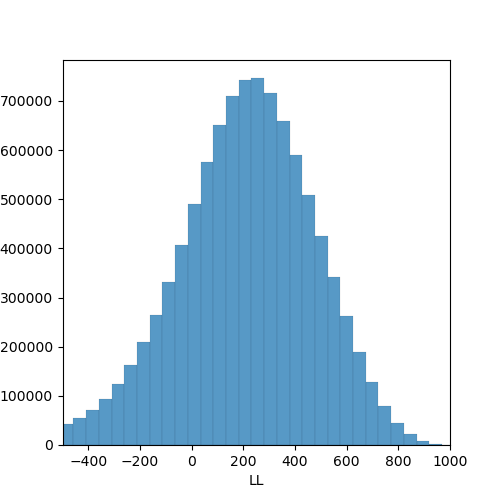

In [14]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
_ = sns.histplot(viirs.LL, bins=500, ax=ax)
#
ax.set_xlim(-500., 1000.)
#
plt.show()

## DT vs. LL

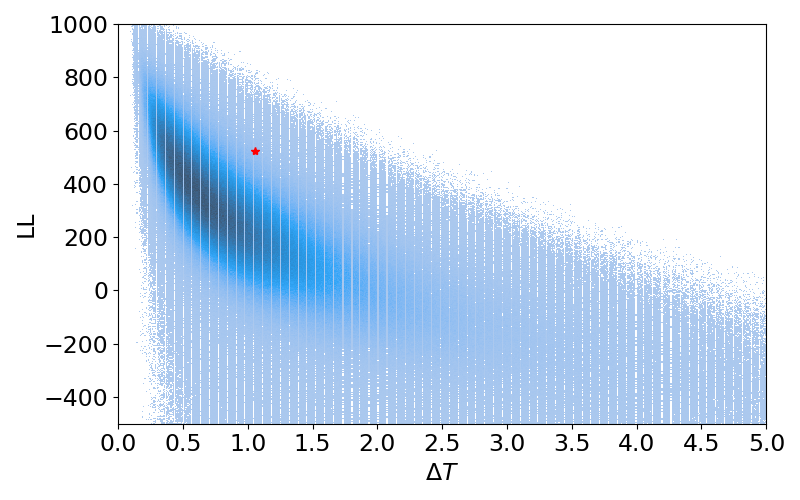

In [16]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
#
_ = sns.histplot(x=viirs.DT, y=viirs.LL, ax=ax)#, s=0.5)
# Our object
ax.plot(meta['T90']-meta['T10'], LL, 'r*')
#
ax.set_xlim(0., 5.)
ax.set_ylim(-500., 1000.)
# 
ax.set_xlabel(r'$\Delta T$')
ax.set_ylabel('LL')
ax.xaxis.set_major_locator(MultipleLocator(0.5))
plotting.set_fontsize(ax, 17.)
#
plt.tight_layout()
plt.show()

# Cut on Region

In [17]:
viirs.lon.min()

np.float64(-179.99992)

In [18]:
ddeg = 2.
in_region = (np.abs(viirs.lon-130.5) < ddeg) & (np.abs(viirs.lat-20.5) < ddeg)
v_in = viirs[in_region]
np.sum(in_region)

np.int64(4398)

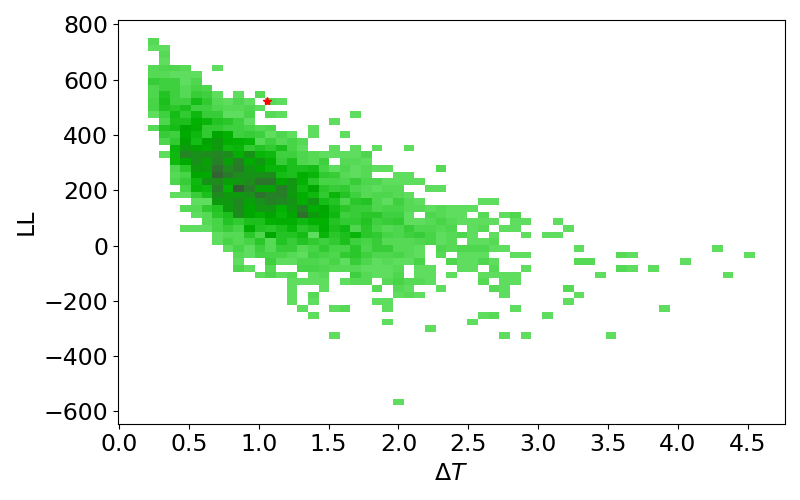

In [19]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
#
_ = sns.histplot(x=v_in.DT, y=v_in.LL, ax=ax, color='green')#, s=0.5)
# Our object
ax.plot(meta['T90']-meta['T10'], LL, 'r*')
#
#ax.set_xlim(0., 2.)
#ax.set_ylim(-500., 1000.)
#
ax.set_xlabel(r'$\Delta T$')
ax.set_ylabel('LL')
plotting.set_fontsize(ax, 17.)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
# 
#
plt.tight_layout()
plt.show()

----

In [30]:
from importlib import resources
glob.glob(os.path.join(resources.files('nenya'), '../', 'runs', 'viirs', '*'))

['/home/xavier/Projects/Oceanography/python/nenya/nenya/../runs/viirs/nenya_viirs_v1_train.yaml',
 '/home/xavier/Projects/Oceanography/python/nenya/nenya/../runs/viirs/opts_viirs_v1.json',
 '/home/xavier/Projects/Oceanography/python/nenya/nenya/../runs/viirs/nenya_viirs_v1_evaluate.yaml',
 '/home/xavier/Projects/Oceanography/python/nenya/nenya/../runs/viirs/nenya_viirs.py']